# SyriaTel Customer Churn Prediction

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Load Dataset

data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')


In [74]:
data.head(10)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


Find the shape of the dataset

In [75]:
data.shape

(3333, 21)

In [76]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 3333
Number of Columns 21


Get Information about the data set

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

As of now There are 3333 rows and 20 columns in above dataset.
Out of which there are 1 boolean data type i.e churn
8 float data type
8 integer data type
3 object data type i.e catagarical value are there
There are no missing value present so no need to do the missing value imputation



Check null values in the dataset

In [78]:
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

<AxesSubplot:>

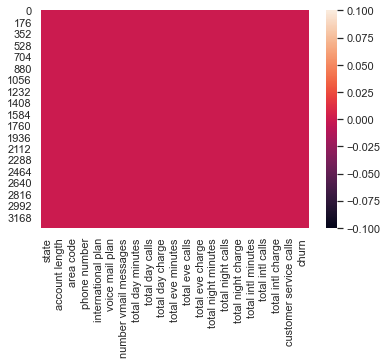

In [79]:
# Visualizing the missing values
sns.heatmap(data.isnull())


There is no missing and duplicate values in the dataset.

# Get overal statitistic of the dataset

In [80]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Droping irrelevant features

In [81]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Variables Description
State :All 51 states

Account Length : How long account has been active

Area Code : Code Number of Area

lntl Plan : International plan activated ( yes, no )

VMail Plan : Voice Mail plan activated ( yes ,no )

VMail Message : No.of voice mail messages

Day Mins : Total day minutes used

Day calls : Total day calls made

Day Charge : Total day charge

Eve Mins : Total evening minutes

Eve Calls : Total evening calls

Eve Charge : Total evening charge

Night Mins : Total night minutes

Night Calls : Total night calls

Night Charge : Total night charge

Intl Mins : Total International minutes used

Intl Calls : Total International calls made

Intl Charge : Total International charge

CustServ calls : Number of customer service calls made

Churn : Customer churn (Target Variable True=1, False=0)



In [82]:
data = data.drop(['phone number'], axis=1)

In [83]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Encoding of Categorical data

In [84]:
#Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

data['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [85]:

data['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [86]:

data['churn'].unique()

array([False,  True])

In [87]:
print(data.churn.value_counts())
print(" ")

False    2850
True      483
Name: churn, dtype: int64
 


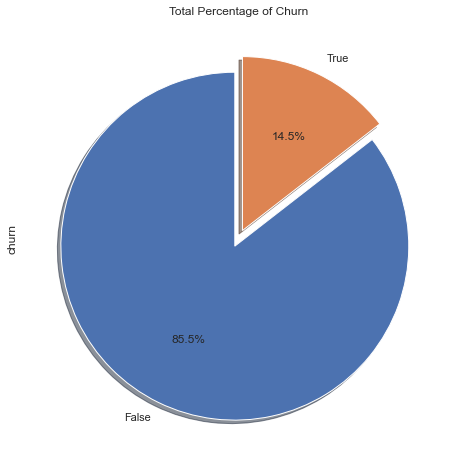

In [88]:
#To get the pie chart to analyze churn
data ['churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Total Percentage of Churn')
plt.show()


The chart reveals that out of the total dataset, 85.5% (2,850 customers) have not churned, while 14.5% (483 customers) have churned. Although 14.5% might seem like a relatively small number, it's important to note that this figure has risen significantly from its previous level of 1.45%. This indicates a notable increase in customer churn and necessitates prompt attention.

Analyzing "State" column

In [89]:
data['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

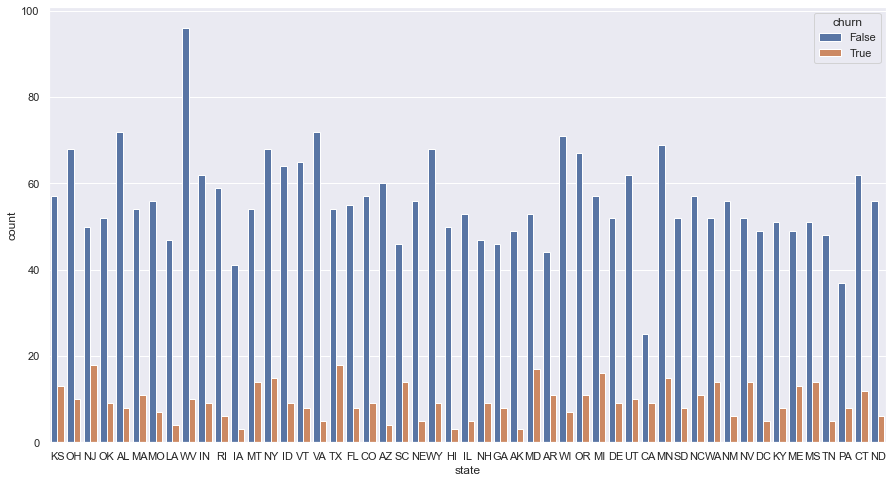

In [90]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='state', hue="churn", data=data)
plt.show()


In [91]:
#show the most churn state of top 10 by ascending the above list
state_df = data.groupby(['state'])['churn'].mean().sort_values(ascending = False)
state_df.head(10)

state
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: churn, dtype: float64

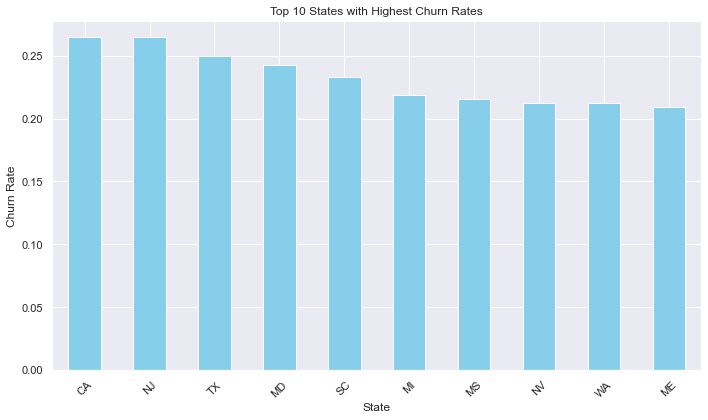

In [92]:
# Plot the bar chart

plt.figure(figsize=(10, 6)) 
state_df.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States with Highest Churn Rates')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)  
plt.tight_layout()

# Show the plot
plt.show()

There are 51 unique state present who have different churn rate.

From the above analysis CA, NJ, TX, MD, SC, MI are the ones who have a higher churn rate of more than 22%

Area Code Analysis

In [93]:
# Area Code wise churn Percentage
area_code_churn_perc = (data.groupby(['area code'])['churn'].mean()*100).reset_index()
area_code_churn_perc

,area code,churn
0,408,14.558473
1,415,14.259819
2,510,14.880952


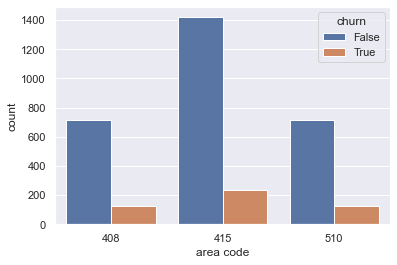

In [94]:
sns.set(style="darkgrid")
ax = sns.countplot(x='area code', hue="churn", data=data)
plt.show()

In the above data, we notice that there is only 3 unique value are there i.e 408,415,51

International Plan Analysis

In [95]:
data['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [96]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [97]:
#Show count value of 'yes','no'

data['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [98]:
#Calculate the International Plan vs Churn percentage 

International_plan_data = pd.crosstab(data["international plan"],data["churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)


churn               False  True  Percentage Churn
international plan                               
no                   2664   346         11.495017
yes                   186   137         42.414861


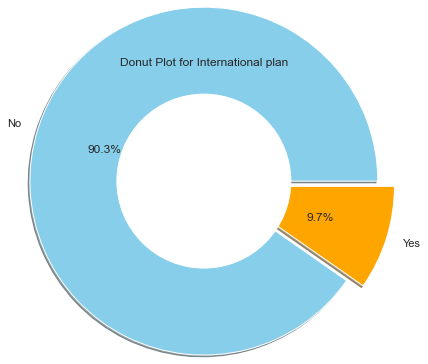

In [99]:
#To get the Donut Plot to analyze International Plan
data_plan = data['international plan'].value_counts()
explode = (0, 0.2)
plt.pie(data_plan, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['skyblue' ,'orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

In this analysis, 3010 dont have an international plan, 323 have an international plan.

Correlation Heatmap

In [100]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [117]:
corr = data.corr()
corr

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,...,-0.013148,-0.000397,0.018810,0.012627,0.003555,-0.008476,-0.025631,0.018058,0.024735,0.002918
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,...,-0.015205,0.024545,-0.012636,0.007823,-0.000510,0.005189,0.029812,-0.001039,0.048551,-0.000747
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,...,-0.017963,0.004353,-0.011911,-0.016959,-0.036747,0.002070,0.008308,-0.017748,0.008745,0.956927
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,...,0.004752,0.010353,-0.007147,0.006200,-0.002695,-0.001832,-0.019383,0.001115,0.049396,-0.001684
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,...,-0.003329,-0.010940,0.037767,-0.000797,0.005393,-0.028977,0.030234,0.013681,0.003755,-0.011086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
state_WI,-0.008476,0.005189,0.002070,-0.001832,-0.028977,-0.001839,-0.010750,-0.004475,-0.010741,-0.005028,...,-0.023002,-0.023002,-0.023805,-0.023165,-0.022002,1.000000,-0.028056,-0.023805,0.002959,0.006313
state_WV,-0.025631,0.029812,0.008308,-0.019383,0.030234,-0.019380,-0.044919,-0.018722,-0.044945,0.000658,...,-0.026930,-0.026930,-0.027871,-0.027121,-0.025760,-0.028056,1.000000,-0.027871,-0.018913,-0.001233
state_WY,0.018058,-0.001039,-0.017748,0.001115,0.013681,0.001107,0.014704,-0.006798,0.014692,-0.005184,...,-0.022850,-0.022850,-0.023649,-0.023012,-0.021858,-0.023805,-0.027871,1.000000,0.017134,-0.014735
international plan_yes,0.024735,0.048551,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,...,-0.006819,-0.006819,0.010383,-0.007445,-0.017442,0.002959,-0.018913,0.017134,1.000000,0.006006


<AxesSubplot:>

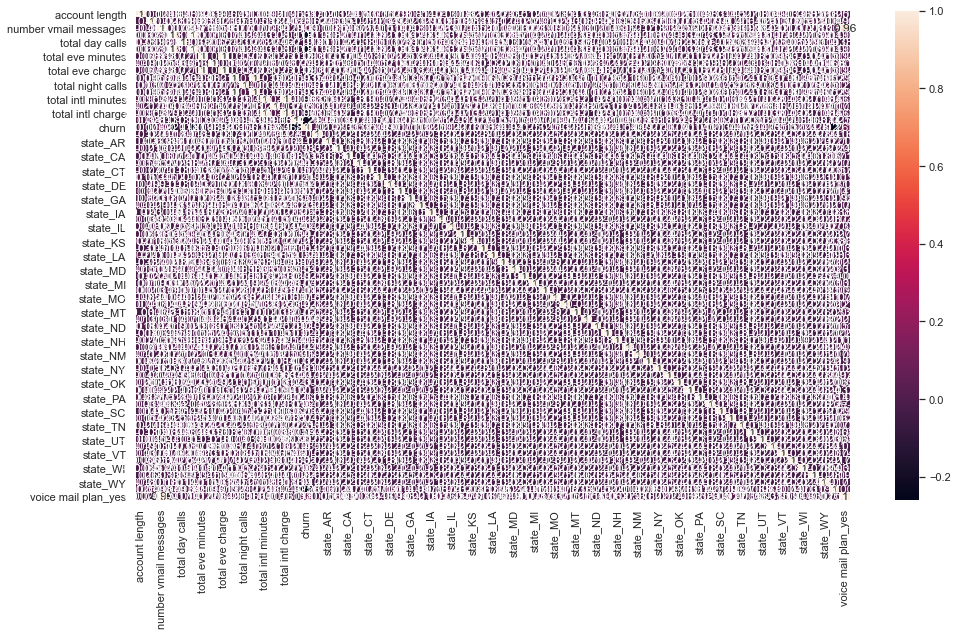

In [118]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot = True)

In [101]:
data = pd.get_dummies(data, drop_first=True)

In [102]:
data.head(10)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0
5,118,510,0,223.4,98,37.98,220.6,101,18.75,203.9,...,0,0,0,0,0,0,0,0,1,0
6,121,510,24,218.2,88,37.09,348.5,108,29.62,212.6,...,0,0,0,0,0,0,0,0,0,1
7,147,415,0,157.0,79,26.69,103.1,94,8.76,211.8,...,0,0,0,0,0,0,0,0,1,0
8,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,0,0,0,0,0,0,0,0,0,0
9,141,415,37,258.6,84,43.96,222.0,111,18.87,326.4,...,0,0,0,0,0,0,1,0,1,1


In [103]:
data.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA'

In [104]:
#Check Unique Values for each variable.
for i in data.columns:
  print(i,"is", data[i].nunique())

account length is 212
area code is 3
number vmail messages is 46
total day minutes is 1667
total day calls is 119
total day charge is 1667
total eve minutes is 1611
total eve calls is 123
total eve charge is 1440
total night minutes is 1591
total night calls is 120
total night charge is 933
total intl minutes is 162
total intl calls is 21
total intl charge is 162
customer service calls is 10
churn is 2
state_AL is 2
state_AR is 2
state_AZ is 2
state_CA is 2
state_CO is 2
state_CT is 2
state_DC is 2
state_DE is 2
state_FL is 2
state_GA is 2
state_HI is 2
state_IA is 2
state_ID is 2
state_IL is 2
state_IN is 2
state_KS is 2
state_KY is 2
state_LA is 2
state_MA is 2
state_MD is 2
state_ME is 2
state_MI is 2
state_MN is 2
state_MO is 2
state_MS is 2
state_MT is 2
state_NC is 2
state_ND is 2
state_NE is 2
state_NH is 2
state_NJ is 2
state_NM is 2
state_NV is 2
state_NY is 2
state_OH is 2
state_OK is 2
state_OR is 2
state_PA is 2
state_RI is 2
state_SC is 2
state_SD is 2
state_TN is 2
state_

In [105]:
data['churn'] = pd.get_dummies(data['churn'])

In [106]:
data['churn'].value_counts()

1    2850
0     483
Name: churn, dtype: int64

In [107]:
import seaborn as sns

C:\Users\Allan\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

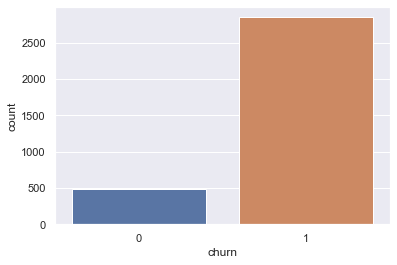

In [108]:
sns.countplot(data['churn'])

In [109]:
X = data.drop('churn', axis = 1)
y = data['churn']


Handling Imbalanced data with SMOTE

In [113]:
#SMOTE technique to deal with unbalanced data problem

from imblearn.over_sampling import SMOTE 

In [114]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [115]:
y_res.value_counts()

1    2850
0    2850
Name: churn, dtype: int64

Splitting the dataset into training set and test set

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [121]:
X_test.shape

(1140, 68)

Feature Scaling

In [122]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [123]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
X_train

array([[ 1.57038483, -0.51181663, -0.53516577, ..., -0.12486072,
        -0.30881049, -0.4783088 ],
       [ 1.19782731, -0.51181663, -0.53516577, ..., -0.12486072,
        -0.30881049, -0.4783088 ],
       [-0.63834908,  1.74949111,  1.83419115, ..., -0.12486072,
        -0.30881049,  2.09069958],
       ...,
       [-0.10612404, -0.6784393 , -0.53516577, ..., -0.12486072,
        -0.30881049, -0.4783088 ],
       [ 0.53254601, -0.63083282, -0.53516577, ..., -0.12486072,
        -0.30881049, -0.4783088 ],
       [ 1.8098861 , -0.51181663, -0.53516577, ..., -0.12486072,
        -0.30881049, -0.4783088 ]])

# 
Apply Machine Learning Models 

Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
log = LogisticRegression()

In [133]:
log.fit(X_train, y_train)

LogisticRegression()

In [227]:
y_pred = log.predict(X_test)

In [230]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [160]:
acc = accuracy_score(y_test, y_pred)
acc

0.9087719298245615

In [231]:
prec = precision_score(y_test, y_pred)
prec

0.8897893030794165

In [232]:
rel = recall_score(y_test, y_pred)
rel

0.9384615384615385

In [233]:
f1  = f1_score(y_test, y_pred)
f1

0.9134775374376041

In [164]:
import pandas as pd

results = pd.DataFrame([['Logistic Regression', acc, prec, rel, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
results


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.908772,0.889789,0.938462,0.913478


In [185]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[487  68]
 [ 36 549]]


In [186]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.88      0.90       555
           1       0.89      0.94      0.91       585

    accuracy                           0.91      1140
   macro avg       0.91      0.91      0.91      1140
weighted avg       0.91      0.91      0.91      1140



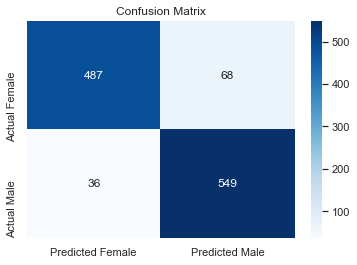

In [187]:
# Display the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Female', 'Predicted Male'], yticklabels=['Actual Female', 'Actual Male'])
plt.title('Confusion Matrix')
plt.show()

Model accuracy is 90.1%, which isn't bad. F1 score is only 91.3%

Support Vector Classifier

In [145]:
from sklearn import svm

In [146]:
svm = svm.SVC()

In [147]:
svm.fit(X_train, y_train)

SVC()

In [174]:
y_pred_svc = svm.predict(X_test)

In [175]:
acc = accuracy_score(y_test, y_pred_svc)
acc

0.8991228070175439

In [176]:
prec = precision_score(y_test, y_pred_svc)
prec

0.8528528528528528

In [177]:
rel = recall_score(y_test, y_pred_svc)
rel

0.9709401709401709

In [178]:
f1  = f1_score(y_test, y_pred_svc)
f1

0.9080735411670664

In [188]:

results2 = pd.DataFrame([['SVC', acc, prec, rel, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
results2


,Model,Accuracy,Precision,Recall,F1
0,SVC,0.899123,0.852853,0.97094,0.908074


In [234]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

print(conf_matrix_svc)

[[457  98]
 [ 17 568]]


In [235]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       555
           1       0.85      0.97      0.91       585

    accuracy                           0.90      1140
   macro avg       0.91      0.90      0.90      1140
weighted avg       0.91      0.90      0.90      1140



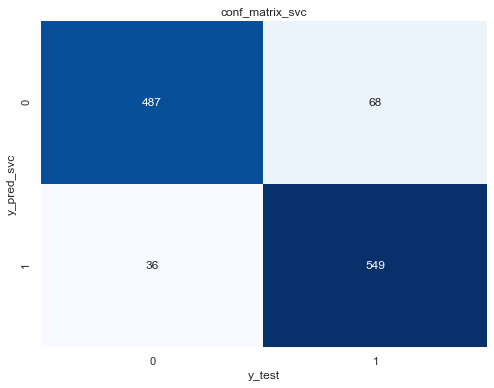

In [193]:
plt.figure(figsize=(8, 6))  # Set the figure size as needed
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and a title
plt.xlabel('y_test')
plt.ylabel('y_pred_svc')
plt.title('conf_matrix_svc')

# Show the heatmap
plt.show()

KNeighbors Classifier

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn = KNeighborsClassifier()

In [153]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [213]:
pred_knn = knn.predict(X_test)

In [214]:
acc = accuracy_score(y_test, pred_knn)
acc

0.9105263157894737

In [215]:
prec = precision_score(y_test, pred_knn)
prec

0.8732612055641422

In [216]:
rel = recall_score(y_test, pred_knn)
rel

0.9658119658119658

In [217]:
f1  = f1_score(y_test, pred_knn)
f1

0.9172077922077922

In [218]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       555
           1       0.87      0.97      0.92       585

    accuracy                           0.91      1140
   macro avg       0.92      0.91      0.91      1140
weighted avg       0.92      0.91      0.91      1140



In [219]:
confusion_matrix_knn = confusion_matrix(y_test, pred_knn)
confusion_matrix_knn

array([[473,  82],
       [ 20, 565]], dtype=int64)

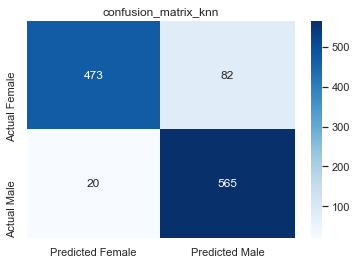

In [220]:
# Display the confusion matrix using seaborn
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Female', 'Predicted Male'], yticklabels=['Actual Female', 'Actual Male'])
plt.title('confusion_matrix_knn')
plt.show()

 DecisionTreeClassifier

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
dt  = DecisionTreeClassifier()

In [196]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [201]:
y_pred_dt = dt.predict(X_test)

In [202]:
accuracy_score(y_test, y_pred_dt)

0.8868421052631579

In [203]:
precision_score(y_test, y_pred_dt)

0.9175824175824175

In [204]:
recall_score(y_test, y_pred_dt)

0.8564102564102564

In [205]:
f1_score(y_test, y_pred_dt)

0.8859416445623343

In [206]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       555
           1       0.92      0.86      0.89       585

    accuracy                           0.89      1140
   macro avg       0.89      0.89      0.89      1140
weighted avg       0.89      0.89      0.89      1140



In [208]:
confusion_matrix_dtc = confusion_matrix(y_test, y_pred_dt)
confusion_matrix_dtc

array([[510,  45],
       [ 84, 501]], dtype=int64)

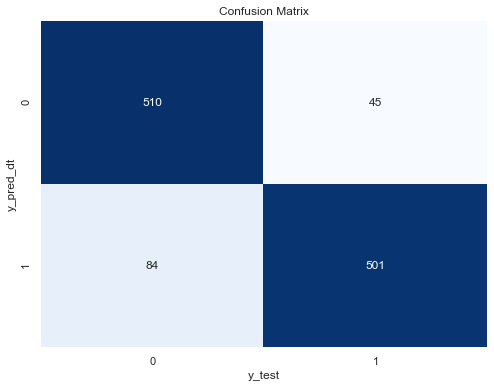

In [210]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size as needed
sns.heatmap(confusion_matrix_dtc, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and a title
plt.xlabel('y_test')
plt.ylabel('y_pred_dt')
plt.title('Confusion Matrix')

# Show the heatmap
plt.show()

# Model Comparisons - Accuracy 

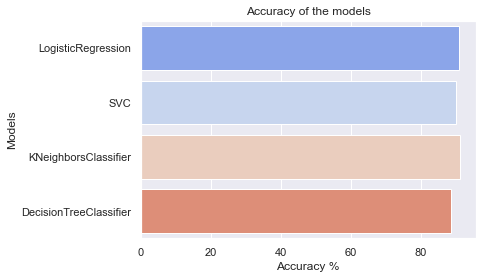

In [221]:
models = [log,svm,knn, dt]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models');


In [222]:
results.sort_values(by="Accuracy",ascending=False)

,Models,Accuracy
0,KNeighborsClassifier,91.052632
0,LogisticRegression,90.877193
0,SVC,89.912281
0,DecisionTreeClassifier,88.684211


Accuracy allows one to measure the total number of prediction a model gets right.
The best performing model will have the highest accuracy.
Of the four models tested, KNeighborsClassifier classifier has the highest accuracy.

# Model Comparisons - F1 Score

In [224]:
from sklearn.model_selection import train_test_split,cross_val_score

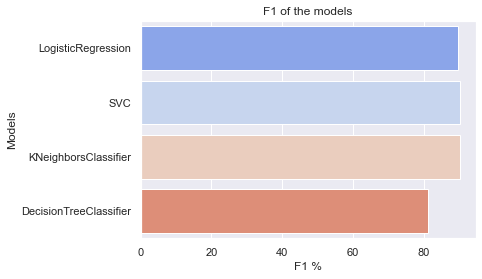

In [236]:
models = [log,svm,knn, dt]

result = []
results = pd.DataFrame(columns= ["Models","F1"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model,X_test,y_test,cv=10,scoring="f1_weighted").mean()  
    result = pd.DataFrame([[names, f1*100]], columns= ["Models","F1"])
    results = results.append(result)
    
sns.barplot(x= 'F1', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('F1 %')
plt.title('F1 of the models');

In [238]:
results.sort_values(by="F1",ascending=False)


,Models,F1
0,KNeighborsClassifier,90.092238
0,SVC,90.079953
0,LogisticRegression,89.543552
0,DecisionTreeClassifier,81.279757


F1 score measures the harmonic mean between precision and recall
It is a value between 0 and 1, with 1 being a perfect score and an indication everything was observed correctly.
KNeighborsClassifier classifier had the highest F1 score.

# Conclusion

The company should improve on customer retention and reduce customer churn.
This project analyzed a churn dataset to identify the main factors contributing to churn and gain valuable insights. 

Through exploratory data analysis, we were able to gain insight into the  Syrialtel churn dataset.

The churn pie chart reveals that out of the total dataset, 85.5% (2,850 customers) have not churned, while 14.5% (483 customers) have churned.
This indicates a notable increase in customer churn and necessitates prompt attention.

CA, NJ, TX, MD, SC, MI are the states who have a higher churn rate of more than 22%.

The area code may not be relevant and can be excluded